In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif" 
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
import pandas as pd
import bqplot
import datetime as dt 

%matplotlib inline

In [2]:
#reading the dataset
udemy_data = pd.read_csv('udemy_courses.csv', 
                    dayfirst=True, sep=',')

In [3]:
udemy_data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [4]:
#number of rows and columns in dataset
udemy_data.shape

(3678, 12)

In [5]:
#exploring unique courses tought
udemy_data["subject"].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

<AxesSubplot:xlabel='level'>

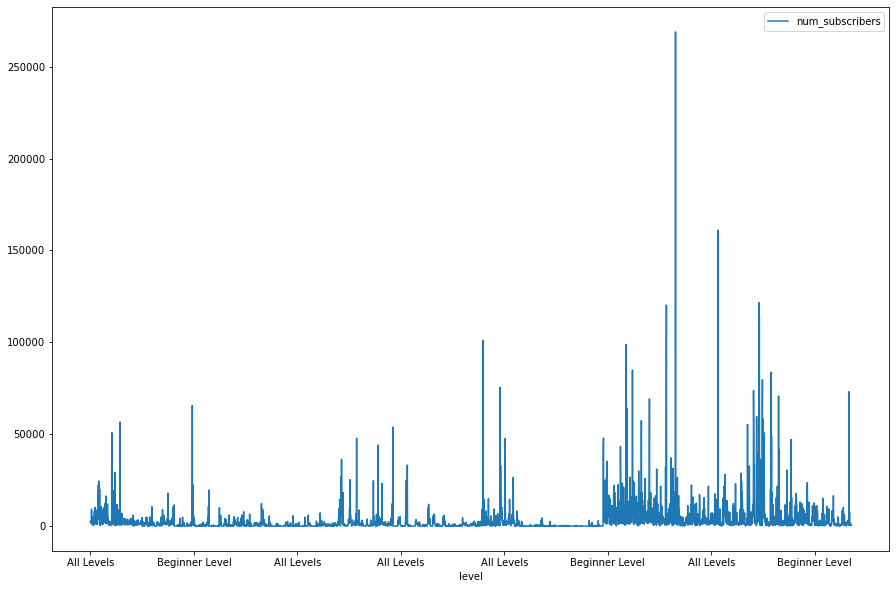

In [131]:
#simple chart to explore relationships in columns
udemy_data.plot(x="level", y="num_subscribers", figsize=(15,10))


Text(0.5, 1.0, 'Number of Subscribers per Subject taught')

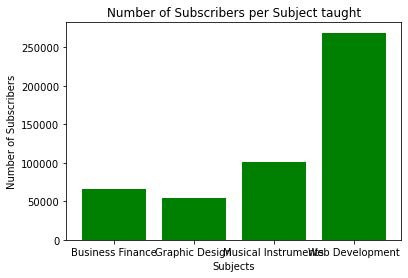

In [126]:
plt.bar(udemy_data["subject"], udemy_data["num_subscribers"], color='green')
plt.xlabel("Subjects")
plt.ylabel("Number of Subscribers")
plt.title("Number of Subscribers per Subject taught")


In [127]:
A

<BarContainer object of 3678 artists>

**Bar Graph to showcase total number of subscribers for each subject category** 

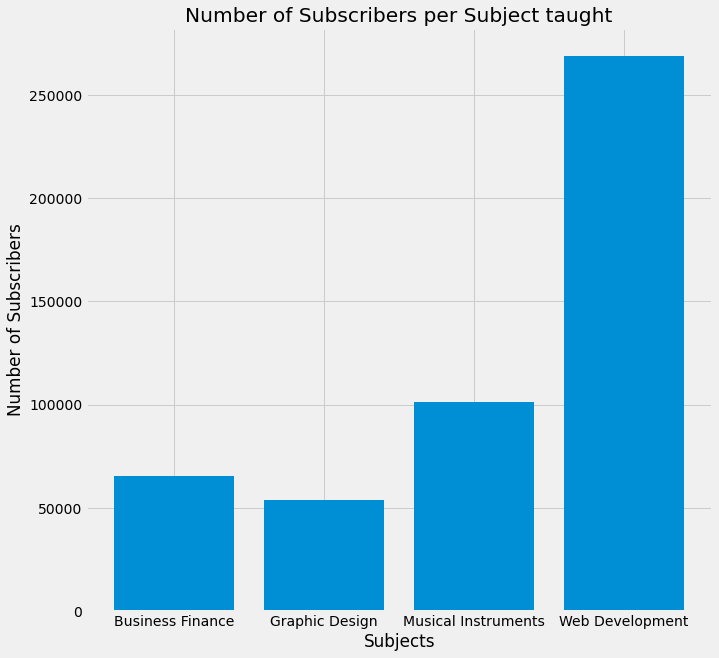

In [128]:
with plt.style.context('fivethirtyeight'): # this style is applied ONLY to this plot and not following
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.bar(udemy_data["subject"],udemy_data["num_subscribers"] )
    
    ax.set_xlabel("Subjects")
    ax.set_ylabel("Number of Subscribers")
    ax.set_title("Number of Subscribers per Subject taught")

In [9]:
heat_data = udemy_data.groupby('subject')['num_lectures'].sum()
heat_data


subject
Business Finance       38755
Graphic Design         19329
Musical Instruments    26055
Web Development        63381
Name: num_lectures, dtype: int64

**Data Exploration Dashboard**

In [10]:
##Data Exploration

##Dataset View
full_data = widgets.Output()
full_data.clear_output()
with full_data:
    print(udemy_data)

header_output = widgets.Output()
header_output.clear_output()
with header_output:
    print(udemy_data.head())


##Columns of Dataset
info_output = widgets.Output()
info_output.clear_output()
with info_output:
    print(udemy_data.info())

##Unique Values in Dataset
options_dropdown = widgets.Dropdown(options = udemy_data.columns, description = "Column - ")
unique_output = widgets.Output()

def options_dropdown_eventhandler(change):
  unique_output.clear_output()
  ot = udemy_data[change.new].unique()
  with unique_output:
    display(ot)

options_dropdown.observe(options_dropdown_eventhandler, names='value')
dashboard_unique = widgets.VBox([options_dropdown, unique_output])

##Graph b/w categorical and numeric data
graph = widgets.Output()
dropdown_c1 = widgets.Dropdown(options = udemy_data[['course_id','course_title','is_paid','level','subject']], description = "Variable 1")
dropdown_c2 = widgets.Dropdown(options = udemy_data[['num_subscribers','num_reviews', 'num_lectures', 'price','content_duration']], description = "Variable 2")

def common(x='subject', y = 'num_reviews'):
  graph.clear_output()
  gf = udemy_data.plot(x=x, y=y, style='o')
  with graph:
    display(gf)

def dropdown_c1_eventhandler(change):
    common(change.new, dropdown_c2.value)
def dropdown_c2_eventhandler(change):
    common(dropdown_c1.value, change.new)

dropdown_c1.observe(dropdown_c1_eventhandler, names='value')
dropdown_c2.observe(dropdown_c2_eventhandler, names='value')

dashboard_graph = widgets.VBox([dropdown_c1, dropdown_c2, graph])

In [11]:
##Dashboard for data exploration
tab = widgets.Tab([full_data,header_output, info_output, dashboard_unique, dashboard_graph])
tab.set_title(0, 'Dataset')
tab.set_title(1, 'Columns of Dataset')
tab.set_title(2, 'Data Information')
tab.set_title(3, 'Unique values in column')
tab.set_title(4, 'Graph: categorical vs numeric')
display(tab)


In [12]:
# heat1 = udemy_data[['subject', 'num_lectures']]
# heat1

In [13]:
#pivot Table
total_by_sub = pd.pivot_table(udemy_data, index = ["subject"], columns = ["level"], values = ["num_reviews"], aggfunc= np.sum)

total_by_sub

num_reviews                                               
level                All Levels Beginner Level Expert Level Intermediate Level
subject                                                                       
Business Finance          39736          28242         1167               6757
Graphic Design            19456          15784           57               1773
Musical Instruments       16787          10347          148               4442
Web Development          328318          74702          961              26044

**Interactive Charts Dashboard**

In [174]:
##FINAL
##Heat Map
# Scales
mySelectedLabel = widgets.Label() 
col_sc = bqplot.ColorScale(scheme = 'RdPu') # like x/y scale, but in "color space"
x_sc = bqplot.OrdinalScale() # ordered, categorical data, because our bins are more like categorical bins
y_sc = bqplot.OrdinalScale()

#creating list for the subject to be used as columns of our heat map
list_sub = total_by_sub.columns.levels[1].to_list()

#Marks
heat_map = bqplot.GridHeatMap(color=total_by_sub, scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
row = total_by_sub.index, column = list_sub,
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'})
color=np.log10(total_by_sub.values)

#Axis 
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label = 'Level of course')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='subject of course')


i,j = 0,0
mask = (udemy_data['subject'] == total_by_sub.index[i]) & \
           (udemy_data['level'] == total_by_sub.columns.levels[1][j])
# new, subset dataframe
udemy_subset = udemy_data[mask]
# grab years and sqft from pandas
grouped = udemy_subset.groupby("subject")["num_reviews"].sum()
price = grouped.index
total_lectures = grouped.values
def get_data_value(change):
    i,j = change['owner'].selected[0]
    # grab buildings subset dataframe
    mask = (udemy_data['subject'] == total_by_sub.index[i]) & \
           (udemy_data['level'] == total_by_sub.columns.levels[1][j])
    udemy_subset = udemy_data[mask]
    # grab years and sqft from pandas
    grouped = udemy_subset.groupby("price")["num_lectures"].sum()
    price = grouped.index
    total_lectures = grouped.values
    barChart.x = price
    barChart.y = total_lectures
heat_map.observe(get_data_value, 'selected')
barChart = bqplot.Bars(x=price, y=total_lectures, scales={'x':x_sc, 'y':y_sc, 'color': col_sc},color_mode='group', stroke='orange')
# finally make a bar plot figure
fig_histogram = bqplot.Figure(marks=[barChart], axes=[x_ax,y_ax],title="Total number of reviews for selected subject in heat map")
fig_histogram

figure_heat_map = bqplot.Figure(marks=[heat_map], axes=[c_ax, x_ax, y_ax], title="Sum of Number of Lectures for selected Subject and Level")
figure_heat_map


Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='RdPu'), side='right'), Axis(label='Lev…

In [15]:
##FINAL
##Scatter Plot
#scales for bar plot plot

x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()
col_sc = bqplot.ColorScale(scheme='Reds')

#Axis for bar plot plot
x_axh = bqplot.Axis(scale=x_sch, label='Price of Course')
y_axh = bqplot.Axis(scale=y_sch, orientation='vertical', label='total Lectures for the course')

barChart = bqplot.Scatter(x=price, y=total_lectures, scales={'x':x_sch, 'y':y_sch, 'color': col_sc},color_mode='group', stroke='orange')
# finally make a bar plot figure
fig_histogram = bqplot.Figure(marks=[barChart], axes=[x_axh,y_axh],title="Sum of Number of lectures for selected subject in heat map")

fig_histogram

Figure(axes=[Axis(label='Price of Course', scale=LinearScale()), Axis(label='total Lectures for the course', o…

In [168]:
##FINAL
##Dashboard

figure_heat_map.layout.min_width = '500px'
fig_histogram.layout.min_width = '500px'
# side by side figures
figures = widgets.VBox([figure_heat_map, fig_histogram], title='dashbaord')

# label on top
myDashboard = widgets.VBox([mySelectedLabel, figures]) 
myDashboard

In [169]:
from ipywidgets import AppLayout, Button

In [170]:
# from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

# form_item_layout = Layout(
#     display='flex',
#     flex_flow='row',
#     justify_content='space-between'
# )

# form_items = [
#     Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
#     Box([Label(value='Egg style'),
#          Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
#     Box([Label(value='Ship size'),
#          FloatText()], layout=form_item_layout),
#     Box([Label(value='Information'),
#          Textarea()], layout=form_item_layout)
# ]

# form = Box(form_items, layout=Layout(
#     display='flex',
#     flex_flow='column',
#     border='solid 2px',
#     align_items='stretch',
#     width='50%'
# )) 
# form

In [171]:
from ipywidgets import Button, GridBox, Layout, ButtonStyle
header  = Button(description='Udemy Courses Dashboard',
                 layout=Layout(width='100%', grid_area='header'),
                 style=ButtonStyle(button_color='lightblue'))
main    = myDashboard

main2  = tab


plt.show()

GridBox(children=[header, main, main2],
        layout=Layout(
            width='100%',
            grid_template_rows='auto auto',
            grid_template_columns='50% 50%',
            grid_template_areas='''
            "header header header"
            "main . main2"
            "footer footer footer "
            ''')
       )

GridBox(children=(Button(description='Udemy Courses Dashboard', layout=Layout(grid_area='header', width='100%'…

In [173]:
plt.savefig('output.png', dpi=300, bbox_inches='tight')
fig.tight_layout()
plt.savefig('output.png', dpi=300)

AttributeError: 'Figure' object has no attribute 'tight_layout'

<Figure size 432x288 with 0 Axes>

In [161]:
header  = Button(description='Header',
                 layout=Layout(width='100%', grid_area='header'),
                 style=ButtonStyle(button_color='lightblue'))
GridBox(children=[Button(layout=Layout(width='100%', height='100%'),
                         style=ButtonStyle(button_color='darkseagreen')) for i in range(9)
                 , main, main2],
        layout=Layout(
            width='100%',
            grid_template_columns='auto auto auto',
            grid_template_rows='auto auto auto',
            grid_gap='5px 10px'
        grid_template_areas='''
            "header header header"
            "main . main2 "
            "footer footer footer "
            ''')
       )
GridBox(children=[header, main, main2],
        layout=Layout(
            width='100%',
            grid_template_rows='auto auto',
            grid_template_columns='100% 50%',
            grid_template_areas='''
            "header header header"
            "main . main2 "
            "footer footer footer "
            ''')
       )

SyntaxError: invalid syntax (<ipython-input-161-dbabb5d667e3>, line 6)

In [39]:
GridBox(children=[myDashboard],
        layout=Layout(
            width='100%',
            grid_template_columns='500px 500px 700px',
            grid_template_rows='500px 500px 700px',
            grid_gap='100px 10px')
       )

GridBox(children=(VBox(children=(Label(value=''), HBox(children=(Figure(axes=[ColorAxis(orientation='vertical'…

AttributeError: module 'matplotlib.pyplot' has no attribute 'myDashboard'

**Writeup**

The data represents the information about the various courses taught by Udemy which is an online learning and teaching marketplace. It gives larger picture of what subjects or industry Udemy has most courses and there subscribers, course_id etc.
I have created mainly two views in my dashboard.

Data Exploration View-

First one uses Tab Widget that takes list of widgets and places tabs for each one of them.
I have referred to this source because I learned broader use of tabs and it was helpful to give understanding of data. https://code-ml.com/index.php/2021/05/22/introduction-to-widgets-in-jupyter-notebook-build-your-own-pandas-profiler/
First tab shows full dataset.
Second tab shows the header that is columns of dataset.
Third tab shows data type of each column in the dataset.
Fourth Tab shows Unique Value of the selected variable in the dataset
Fifth Tab makes graph between the two variables selected by user. I have Stored categorical data in Varibale 1 and Numeric Data in Variable 2 so that the Scatter plot gets plotted and there is clear understanding for tpart e user.

Interactive Chart View-

The second View that I have created is a Heat Map that allows user to choose specific subject and level of course combination, on basis of which the Scatter Plot will be plotted. The Scatter plot shows total number of reviews V/s price of course for the combination selected in the Heat Map.

Apart from these views I have created some charts such as Bar plot to show total number of lectures for specific subject, Scatter plot to show relationship between content duration and number of lectures.


Contextual Dataset-
As this dataset is related to online study platform company, I found another dataset of Coursera that explores the courses availabe in Coursera, thier title, their level of difficulty etc.
This dataset can then be used to create views for similar qualities like udemy_data so that I can show some comparision between both companies and thier performance.
Dataset - https://www.kaggle.com/siddharthm1698/coursera-course-dataset

In [26]:
#Scatter Plot Extra
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label='content_duration')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='num_lectures')


c_sc = bqplot.ColorScale() # color scale

c_ax = bqplot.ColorAxis(scale = c_sc, label='log(sec)', 
                        orientation = 'vertical', side = 'right')
scatters = bqplot.Scatter(x = udemy_data['content_duration'],
                          y = udemy_data['num_lectures'],
                          color=np.log10(udemy_data['num_reviews']), # here we take log, base 10
                          scales = {'x': x_sc, 'y': y_sc, 'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

C:\Users\aashi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Figure(axes=[Axis(label='content_duration', scale=LinearScale()), Axis(label='num_lectures', orientation='vert…

In [27]:
#Extra
#Unable to put Unique value in x-axis
# Scales
col_sc = bqplot.ColorScale(scheme = 'RdPu') # like x/y scale, but in "color space"
x_sc = bqplot.OrdinalScale() # ordered, categorical data, because our bins are more like categorical bins
y_sc = bqplot.OrdinalScale()

#creating list for the agency to be used as columns of our heat map
list_a = total_by_sub.columns.levels[1].to_list()

#Marks
heat_map = bqplot.GridHeatMap(color=total_by_sub, scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
row = total_by_sub.index, column = list_a,
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'})
color=np.log10(total_by_sub.values)

#Axis 
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label = 'County')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical')


i,j = 0,0
mask = (udemy_data['subject'] == total_by_sub.index[i]) & \
           (udemy_data['level'] == total_by_sub.columns.levels[1][j])
# new, subset dataframe
subset = udemy_data[mask]
# grab years and sqft from pandas
grouped = udemy_data.groupby("subject")["num_reviews"].sum()
sub = grouped.index
reviews = grouped.values
def get_data_value(change):
    i,j = change['owner'].selected[0]
    # grab buildings subset dataframe
    mask = (udemy_data['subject'] == total_by_sub.index[i]) & \
           (udemy_data['num_reviews'] == total_by_sub.columns.levels[1][j])
    buildings_subset = udemy_data[mask]
    # grab years and sqft from pandas
    grouped = subset.groupby("subject")["num_reviews"].sum()
    sub = grouped.index
    reviews = grouped.values
    barChart.x = sub
    barChart.y = reviews
heat_map.observe(get_data_value, 'selected')
barChart = bqplot.Bars(x=sub, y=reviews, scales={'x':x_sc, 'y':y_sc, 'color': col_sc},color_mode='group', stroke='orange')
# finally make a bar plot figure
fig_histogram = bqplot.Figure(marks=[barChart], axes=[x_ax,y_ax],title="Total Square Footage acquired for the year selected in heat map")
fig_histogram

figure_heat_map = bqplot.Figure(marks=[heat_map], axes=[c_ax, x_ax, y_ax], title="Mean of total square footage for selected Agency Name and County")
figure_heat_map

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='RdPu'), side='right'), Axis(label='Cou…

In [29]:
bqplot.__version__


'0.12.30'

In [30]:
# def create_scatter(feature1, feature2):
#     fig = plt.figure(title="%s vs %s Relation"%(feature1.capitalize(), feature2.capitalize()))

#     scat = plt.scatter(x=udemy_data['subject'],
#                        y=udemy_data['num_reviews'],
#                        color=udemy_data['subject'],
#                       )

#     plt.xlabel(feature1.capitalize())
#     plt.ylabel(feature2.capitalize())

#     plt.show()

In [31]:
# widgets.interact(create_scatter, feature1=udemy_data.iloc[:,10], feature2=udemy_data.iloc[:,10]);


In [32]:
# c_slider = widgets.IntSlider(min=0, max=len(udemy_data), step=1, value=5)
# d_select =  widgets.Select(options=udemy_data['is_paid'].unique())
 
# def update_c_range(*args):
#     if d_select.value=='All':
#         c_slider.max = len(udemy_data)
#     else:
#         c_slider.max = len(udemy_data[udemy_data['num_reviews']==d_select.value])
 
# d_select.observe(update_c_range, 'value')
 
# def view3(course_is_paid='',num_reviews=''):
#     if course_is_paid=='All': return udemy_data.head(y)
#     return udemy_data[udemy_data['num_reviews']==course_is_paid].head(num_reviews)
 
# widgets.interactive(view3,num_reviews=c_slider,course_is_paid=d_select)

In [33]:
# udemy_data